In [4]:
import tensorflow as tf #imports tensorflow as tf. Tensorflow is an n-dimensional matrix, just like a 1-D vector, 2-D array, 3-D array etc.
import numpy as np #imports numpy as np. Numpy is used for basic matrix multiplication, addition, subtraction etc.
from tensorflow.examples.tutorials.mnist import input_data #imports mnist input data from tensorflow examples. 
#Mnist data set consists of images of numbers from 0-9, each image is a 28*28 dimensional. There are total 60k training images and 10k test images.
mnist = input_data.read_data_sets("MNIST/data", one_hot = True) #using input data call read data sets from a folder MNIST/data and store in mnist.
#one hot vector is used which means at once only one class will be true. Since our images have labels 0-9 that means out of all 10 classes only 1 class will be true at a time rest all will be zero.
from matplotlib import pyplot as plt
%matplotlib inline

Extracting MNIST/data/train-images-idx3-ubyte.gz
Extracting MNIST/data/train-labels-idx1-ubyte.gz
Extracting MNIST/data/t10k-images-idx3-ubyte.gz
Extracting MNIST/data/t10k-labels-idx1-ubyte.gz


In [5]:
#hyperparameters
learning_rate = 0.01 #learning rate is used to reduce our cost/loss/cross entropy and helps in converging or reaching the local optima. The learning rate should neither be too high or too low it should be a balanced rate. 
training_epochs = 40 #number of times we train our network, its like a loop which trains our network, calculates cost, optimizes it in every epoch, also in every epoch we take 
display_step = 1 #after how many epochs we want to output our desired results on screen
batch_size = 100 #this means that our training images will be divided in a fixed batch size and at every batch it will take a fixed number of images and train them. 

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
#placeholder is like a variable to which we will assign data later on. It will allow us to do operations and build our computation graph without feeding in data.
#x will hold the training images in form of matrix,the dimensions of x will be in our case None*784, that is why we use None which allows us to vary the dimensionality of our rows.
#we use float to define its type.
x = tf.placeholder("float", [None, n_input])
#similarly y will hold the label of the training images in form matrix which will be a None*10 matrix. None will be replaced by the number of images we want to train on.
y = tf.placeholder("float", [None, n_classes])

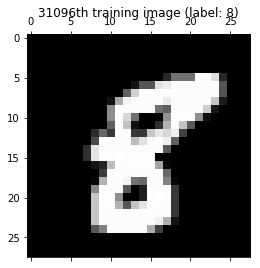

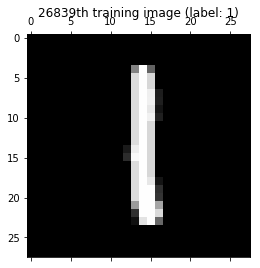

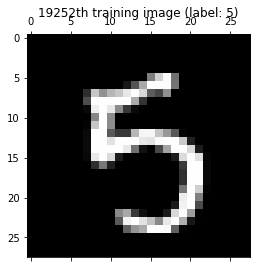

In [6]:
nsample = 3
rand_idx = np.random.randint(mnist.train.images.shape[0], size=nsample)

for i in rand_idx:
    curr_img = np.reshape(mnist.train.images[i, :], (28,28))
    curr_lbl = np.argmax(mnist.train.labels[i, :])
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title(""+str(i)+"th training image "
              + "(label: " + str(curr_lbl) + ")")
    plt.show()

In [15]:
# Store layers weight & bias
#here we define our weights since we our using a 2 layer perceptron so we will have 2 hidden layers and 1 ouput layer weight matrix. The first hidden layer will have dimension of 784*256 and the second hidden layer will have dimension of 256*256. The final output layer will have 256*10 dimensions.
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
#similarly we have 2 bias for hidden layers and 1 for the output layer, with a dimensionality of 256,256,10 column vector.
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# We Create a model in which we pass our weights bias and input image x. Since our batch size is 100 so for each total batch we will have dimensionality of x as 100*784.
#then we will multiply our weight matrix with x and add a bias. Finally apply a ReLU activation function, we can use any activation function we want to. But I tried using Sigmoid and it gave an accuracy 1-2% less than what I got from ReLU.
#we do this for all layers and finally return the value of out_layer
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model and we call the multilayer_perceptron function by passing in x, weights and biases.
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer. We use softmax loss function which is known as cross entropy loss function.
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
#for optimization we use Adam optimizer, we can use Gradient Descent as well.
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [16]:
# Launch the graph. #this is a class that runs all the tensorflow operations and launches the graph in a session. All the operations have to be within the indentation. 
with tf.Session() as sess:
    sess.run(init) ##sess.run(init), runs the variables that were initialised in the previous step and evaluates the tensor 

    # Training cycle
    #we use for loop, to loop around all the 25 training_epochs.

    for epoch in range(training_epochs):
        avg_cost = 0. #initialize avg_cost to zero.
        total_batch = int(mnist.train.num_examples/batch_size) #here we input our batch size and we store the output in total_batch. For eg: we have used 100 as batch size so our total_batch will be 550. You can try printing the value to see how it varies based on the batch size.
        
        for i in range(total_batch):   #now we iterate over each total_batch starting from 0-549
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)  #at each i we load 100 images and there labels in batch_xs and batch_ys, which are nothing but a matrix representation of images.
            
            # Fit training using batch data, think it as optimizer and cost being a root node and x and y their child or parent node.
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,       
                                                          y: batch_ys})
            # Compute average loss                                            
            avg_cost += c / total_batch  #we calculate cost for 100 images once at a time and every time we get next 100 images and this keeps on going for 550 times.
            
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print "Epoch:", '%04d'%(epoch+1), "cost=", "{:.9f}".format(avg_cost)

    print "Optimization Finished!"    

    # Test model, here we check whether the index of the maximum value of the predicted image is equal to the actual labelled image and both will be a column vector.
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    #calculate accuracy across the correct_prediction using reduce_mean. For eg: if we have 10 classes and out of which only 4 classes predicted result was true so we will get something like 4/10 as accuracy.
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # Calculate accuracy for test image and their respective label examples
    print "Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

Epoch: 0001 cost= 50.021130770
Epoch: 0002 cost= 8.828945014
Epoch: 0003 cost= 4.602092031
Epoch: 0004 cost= 3.018981964
Epoch: 0005 cost= 2.542850296
Epoch: 0006 cost= 2.112070576
Epoch: 0007 cost= 2.008525742
Epoch: 0008 cost= 1.854127340
Epoch: 0009 cost= 1.538089088
Epoch: 0010 cost= 1.423981933
Epoch: 0011 cost= 0.984859574
Epoch: 0012 cost= 0.997817939
Epoch: 0013 cost= 0.909362126
Epoch: 0014 cost= 1.017504340
Epoch: 0015 cost= 0.765599993
Epoch: 0016 cost= 0.855902533
Epoch: 0017 cost= 0.500779682
Epoch: 0018 cost= 0.646110838
Epoch: 0019 cost= 0.490635695
Epoch: 0020 cost= 0.498292135
Epoch: 0021 cost= 0.474799784
Epoch: 0022 cost= 0.428691944
Epoch: 0023 cost= 0.371314076
Epoch: 0024 cost= 0.391819412
Epoch: 0025 cost= 0.391502575
Epoch: 0026 cost= 0.286034459
Epoch: 0027 cost= 0.293220083
Epoch: 0028 cost= 0.343594716
Epoch: 0029 cost= 0.259373586
Epoch: 0030 cost= 0.228788215
Epoch: 0031 cost= 0.210991009
Epoch: 0032 cost= 0.217263833
Epoch: 0033 cost= 0.199723549
Epoch: 00